<a href="https://colab.research.google.com/github/bingjun5249/bootcamp/blob/main/bootcampLecture03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install uproot3
!pip install uproot_methods
!pip install mplhep

     |████████████████████████████████| 122kB 5.3MB/s 
     |████████████████████████████████| 92kB 7.8MB/s 
     |████████████████████████████████| 92kB 4.4MB/s 
     |████████████████████████████████| 5.5MB 3.7MB/s 


In [ ]:
import uproot3 as ROOT
import uproot_methods as ROOT_methods
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
import mplhep as hep

In [ ]:
tree = ROOT.open("drive/MyDrive/rootfiles/unweighted_events.root")["LHEF"]

In [ ]:
pt = tree["Particle.PT"].array()
eta = tree["Particle.Eta"].array()
phi = tree["Particle.Phi"].array()
pid = tree["Particle.PID"].array()
status = tree["Particle.Status"].array()

mass = tree["Particle.M"].array()

In [ ]:
nege = (pid == 11) & (status == 1)
pose = (pid == -11) & (status == 1)

In [ ]:
pt_nege = pt[nege]
eta_nege = eta[nege]
phi_nege = phi[nege]

In [ ]:
pt_pose = pt[pose]
eta_pose = eta[pose]
phi_pose = phi[pose]

In [ ]:
dilepton_mass = []
for i in range(len(pt)):
  if pt_nege.counts[i] == 1:
    if pt_pose.counts[i] == 1:
      dilepton_mass.append(np.sqrt(2*pt_pose[i]*pt_nege[i]*(np.cosh(eta_pose[i] - eta_nege[i] - np.cos(phi_pose[i] - phi_nege[i])))))

In [ ]:
dilepton_mass = np.array(dilepton_mass).flatten()

In [ ]:
zmask = (pid == 23)
z_mass = mass[zmask].flatten()

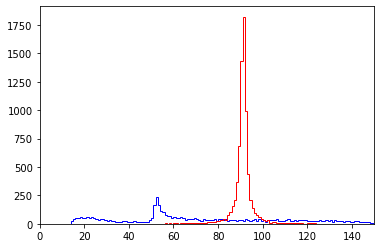

In [ ]:
plt.hist(dilepton_mass,bins=150,range=(0,150),color='blue',histtype='step')
plt.hist(z_mass,bins=150,range=(0,150),color='red',histtype='step')
plt.xlim(0,150)
plt.show()